In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
np.random.seed(3523 - 4 -28)

# ___Making Population Inferences Based on Only One Sample___
----------------

In [1]:
# In practice, we cannot afford to make repetitive sampling attempts
# This is not fiscally sensible and most of the time researches so not have the resources to do so.
# In real life, we end up with just one sample, which we'll use to make inferences.

In [2]:
# There are two approaches to this.

    # Confidence interval estimate for the parameter of interest
    # Hypothesis testing about the parameter of interest

In [3]:
# The term parameter of interest refers to mean, proportion, regression coefficient, odds ratio etc..

In [4]:
# ONE KEY ASSUMPTION WHEN MAKING INFERENCES IS THAT WE ASSUME NORMALITY IN THE SAMPLING DISTRIBUTION OF THE PARAMETER OF INTEREST.

## ___What If The Sampling Distribution is not Approximately Normal?___
-------------

In [5]:
# Will we be able to make sensible inferences in that case?
# We'll discuss alternatives later in this specialization.

## ___Computing the Point Estimates___
-----------------

### ___1) We start by computing unbiased point estimates of the parameter of interest.___

In [7]:
# Unbiased point estimates -> estimates whose mean is equal to mean of the true parameter of interest.
# on other words, unbiased point estimates are estimates computed from repeated random sampling with the same sampling frame.

In [36]:
population = np.random.normal(loc = 100, scale = 180, size = 1000_000)
unbiased_sample_means = np.array([])
biased_sample_means = np.array([])

for i in range(1000):
    unbiased_sample_means = np.append(unbiased_sample_means, np.random.choice(population, 1000, replace = True).mean())
    biased_sample_means = np.append(biased_sample_means, population[i:(i + 1000)].mean())

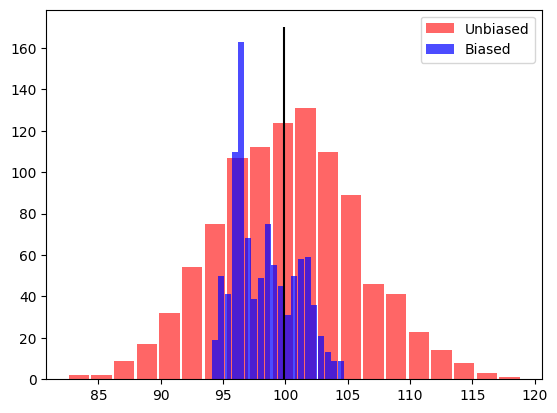

In [40]:
plt.hist(unbiased_sample_means, rwidth = 0.9, color = "red", bins = 20, alpha = 0.6, label = "Unbiased")
plt.hist(biased_sample_means, rwidth = 0.9, color = "blue", bins = 20, alpha = 0.7, label = "Biased")
plt.vlines(x = population.mean(), ymin = 0, ymax = 170, color = "black")
plt.legend()
plt.show()

In [38]:
# Black line is the true population mean.
# The biased sample distribution has shifted its mean to the left, because we sampled within the first 2000 values of a 1,000,000 value
# normal distribution!
# However, the random sampling has an average mean that is reflective of the population mean.

In [41]:
# When the sample is biased, the estimated parameter is likely to differ significantly from the true population parameter.

# WE WANT THE ESTIMATE THAT WE ARE COMPUTING TO BE UNBIASED WITH RESPECT TO THE SAMPLE DESIGN.
# WE WANT THE ESTIMATE OF THE POPULATION PARAMETER TO BE UNBIASED, WITH REGARDS TO THE SAMPLE DESIGN EMPLOYED TO GARNER THE DATA.

In [42]:
# IF SAMPLE DESIGN INVOLVED GROUPS WITH UNEQUAL PROBABILITIES OF SAMPLING, THIS REQUIRES THE USE OF WEIGHTS WHEN COMPUTING POINT ESTIMATES.
# IF WE FAIL TO USE THE WEIGHTS WHEN THE SAMPLING INVOLVED UNEQUAL PROBABILITIES OF SELECTION, OUR SAMPLING DISTRIBUTION MIGHT BECOME
# SHIFTED.

### ___2) Estimate the Sampling Variance Associated with the Point Estimates___

In [43]:
# Technicall we need to draw many samples to compute this variance.
# In practice, we do not have that lavish resources.
# Thus, we need to estimate the variance based on one sample.

In [44]:
# Much like we needing to find an unbiased point estimate, we also need to find an unbiased sampling variance.
# AN UNBIASED SAMPLING VARIANCE CORRECTLY DESCRIBES THE VARIANCE IN THE SAMPLING DISTRIBUTION UNDER THE EMPLOYED SAMPLING DESIGN.
# NOTE THAT THIS SAMPLING VARIANCE IS DEPENDENT ON THE SAMPLING DESIGN.

In [48]:
population = np.random.randint(0, 1000, 10_000)
sample_means = []

for i in range(1000):
    sample_means.append(np.random.choice(population, size = 1000).mean())

In [49]:
population.mean()

499.1997

In [50]:
np.mean(sample_means)

499.052853

In [52]:
# variance in the point estimates
# std = sqrt(variance)

np.std(sample_means)

8.94746623918699

# ___Standard Error of the Point Estimate = $\sqrt{variance}$___

In [5]:
# STANDARD ERROR IS JUST THE STANDARD DEVIATION OF THE SAMPLING DISTRIBUTION.

## ___Forming a Confidence Interval___

In [54]:
# confidence interval = best estimate +- margin of error
# This margin of error accomodates the sampling error (variance in our hypothetical sampling distribution)

In [55]:
# best estimate = unbiased point estimate
# margin of error = a few estimated standard errors
# "a few" because we allow one standard error on either side.

In [3]:
# "a few" ->
            # a multiplier from the appropriate distribution based on the desired confidence level and sample design.

--------------
## ___Confidence interval = best estimate $\pm$ margin of error___
-------------

### ___95% confidence level &rarr; 0.05 significance___

In [6]:
# What this means is that,
# 95% of the intervals constructed this way will cover the true population parameters.

# e.g
# take the best estimate, add/substract n times the standard error, 95% of the intervals constructed this way will cover the true parameter

In [8]:
population = np.random.randint(low = 100, high = 1000, size = 1000_000)
pop_mean = population.mean()

In [15]:
pop_mean

550.030674

In [36]:
# lets make 100 random samples.
sample_size = 1000
sample_means = []

for i in range(100):
    rands = np.random.randint(low = 0, high = sample_size, size = sample_size)
    sample_means.append(population[rands].mean())

# margin of error = 2 * stderr
# the multiplier here ("few times") is 2 here.
stderr = np.std(sample_means) * 2

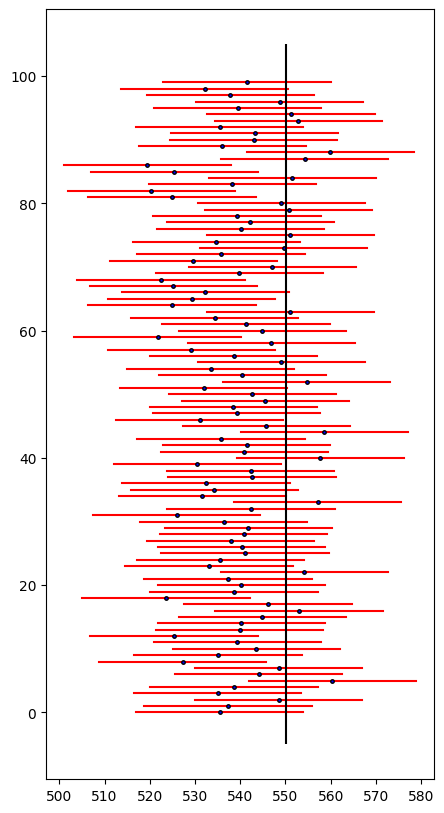

In [48]:
fig, axes = plt.subplots()
fig.set_size_inches(5, 10)
for (i, stat) in enumerate(sample_means):
    axes.plot([stat - stderr, stat + stderr], [i, i], color = "red")
    axes.plot(stat , i, mfc = "blue", mec = "black", linestyle = "none", marker = "o", ms = 2.5)
axes.vlines(x = pop_mean, ymin = -5, ymax = 105, color = "black")
plt.show()

In [49]:
# Here we have the summaries (mean and standard deviations of 100 samples of size 1000)
# sample means are shown as blue dots.
# the horizontal bars indicate the confidence intervals -> sample mean +- (2 * stddev of population)

# as we can see almost all of these intervals cover the population parameter (mean), shown in the black line!.

In [50]:
# In confidence intervals it is important to get all the 3 pieces right to make correct inferences.

# if the best estimate is not an unbiased estimate,
# or if the margin of error does not use the correct multiplier,
# or if the standard error (standard deviation) used in the computation of margin of error is not unbiased,

# The confidence interval will not have the advertised coverage.
# e.g even if we call it a 95% confidence interval, it might only cover the population parameter 90% or 87.765% of the time!

In [51]:
# Intervals give us a range of reasonable values for a specific population parameter.
# If the hypothesized value for a population parameter (sample estimate) lies outside the confidence interval,
# we do not have sufficient statistical evidence to support that value at the given level of significance.

## ___Hypothesis testing about the parameter of interest___
-------------

In [52]:
# This is the second method for making population inferences based on only one sample.

# Hypothesis:

# Could the value of the population parameter be ___________ ? ---> hypothesis or null value
# Is the point estimate (sample estimate) close to this null value or far away?

## ___Standard error of a point estimate = Standard deviation of the sampling distribution___

In [53]:
# A very common form of test statistic ofr these kind of hypothesis testing is, 

## ___Test statistic = $\frac{(estimate~-~null~value)}{standard~error}$___

In [54]:
# This gives an idea about how far away our estimate is from the null hypothesis value.
# i.e how much evidence we have against that paricular null value?

In [ ]:
# If the null is 